In [1]:
import numpy as np
import pickle
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import datetime
import cartopy.crs as ccrs
from matplotlib import gridspec
import cartopy
import warnings
warnings.filterwarnings("ignore")

In [2]:
days = np.arange(0,213)
dates = [datetime.date(2019,10,1)+datetime.timedelta(days=np.int(days)) for days in days]

for day in days:
    date = dates[day].strftime('%Y%m%d')
    try:
        f = open('/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/long_interpolation/FBinterp_'+date+'_50km_9dayT_hindcast_300kmiter_nonzeroMatern.pkl','rb')
        data = pickle.load(f)
        f.close()
        long=[]
        long.extend(data[date+'_interp']) 
                
        short = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/MERGE/FB_interp_'+season+'_50km_'+date+'.npy')

    except:
        pass

In [3]:
season='2019-2020'
date='20191012'

## long interp load data 
datapath = '/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/long_interpolation'
f = open(datapath+'/FBinterp_'+date+'_50km_9dayT_hindcast_300kmiter_nonzeroMatern.pkl','rb')
data = pickle.load(f)
f.close()
long_interp_one=[]
long_interp_one.extend(data[date+'_interp']) 

## short interp load data
datapath='/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/MERGE/'
short_interp_one = np.load(datapath+'FB_interp_'+season+'_50km_'+date+'.npy')

season='2019-2020'
date='20200321'

## long interp load data 
datapath = '/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/long_interpolation'
f = open(datapath+'/FBinterp_'+date+'_50km_9dayT_hindcast_300kmiter_nonzeroMatern.pkl','rb')
data = pickle.load(f)
f.close()
long_interp_two=[]
long_interp_two.extend(data[date+'_interp']) 

## short interp load data
datapath='/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/MERGE/'
short_interp_two = np.load(datapath+'FB_interp_'+season+'_50km_'+date+'.npy')

In [4]:
diff_one = np.abs(long_interp_one) - np.abs(short_interp_one)
diff_two = np.abs(long_interp_two) - np.abs(short_interp_two)

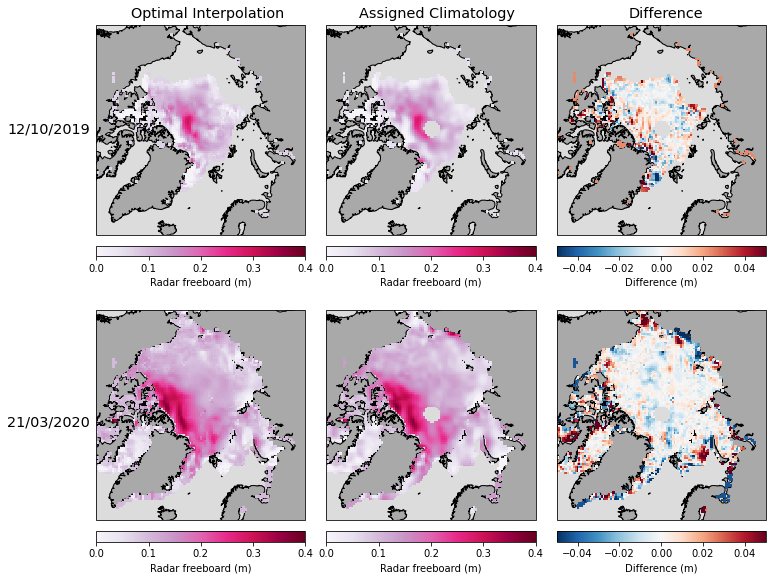

In [5]:
lats = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/auxiliary/lats.npy')
lons = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/auxiliary/lons.npy')

data = [long_interp_one,short_interp_one,diff_one,long_interp_two,short_interp_two,diff_two]

fig = plt.figure(figsize=(12,10.5))
spec = gridspec.GridSpec(ncols=3, nrows=2,wspace=0.1,hspace=0.)

for counter, ax in enumerate(data):
    fb = np.asarray(data[counter])
    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
    ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
    ax.coastlines()
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    if counter in (0,1,3,4):
        p_map = ax.pcolormesh(lons,lats,fb[:-1,:-1],cmap='PuRd',vmin=0,vmax=0.4,transform=ccrs.PlateCarree())
    else:
        p_map = ax.pcolormesh(lons,lats,fb[:-1,:-1],cmap='RdBu_r',vmin=-0.05,vmax=0.05,transform=ccrs.PlateCarree())
    a = plt.colorbar(p_map,location="bottom",fraction=0.046, pad=0.04) 
    if counter in (0,1,3,4):
        a.set_label('Radar freeboard (m)',fontsize='medium')
    else:
        a.set_label('Difference (m)',fontsize='medium')
plt.annotate('Optimal Interpolation',xy=(-1.3,2.45),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')
plt.annotate('Assigned Climatology',xy=(-0.2,2.45),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')
plt.annotate('Difference',xy=(0.7,2.45),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')  
plt.annotate('12/10/2019',xy=(-2.23,1.9),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')
plt.annotate('21/03/2020',xy=(-2.23,0.5),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/supp_figs/long_interp.png',bbox_inches = "tight", dpi = 400)